In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

CPU -->  CPU Load (%) <br>
R    -->        RAM- Random Access Memory (MB)<br>
Rx    -->       RAM in usage (MB)<br>
NCPU   -->      Number of CPU cores<br>
NCPUx  -->      Number of CPU cores in use<br>
NRx   -->       Network inbound traffic (Kbps)<br>
NTx   -->       Network outbound traffic (Kbps)<br>
Pc   -->        Power consumed by host (watts)<br>
Tcpu1  -->      CPU 1 temperature (C)<br>
Tcpu2  -->      CPU 2 temperature (C)<br>
fs1   -->       fan1 speed (RPM)<br>
fs2  -->        fan2 speed (RPM)<br>
fs3  -->        fan3 speed (RPM)<br>
fs4   -->       fan4 speed (RPM)<br>
Tin   -->       Inlet temperature (C)<br>
Nvm   -->       Number of VMs running on host<br>

In [3]:
dataset = pd.read_csv('./Datacenter_dataset.csv')

dataset.head()

,CPU,R,Rx,NCPU,NCPUx,NRx,NTx,Pc,Tcpu1,Tcpu2,fs1,fs2,fs3,fs4,Tin,Nvm
0,37.454012,61062,6992,8926,2,48,1806,1025,1288,2107,20.769461,2,23048.754573,58.727006,30.849479,30.869727
1,95.071431,61044,176,3546,8,3,2769,1169,2864,2900,17.694295,4,57993.403231,87.535715,38.753277,38.621455
2,73.199394,43451,4215,5082,14,16,2345,1636,2096,2581,23.647342,11,31728.034332,76.599697,37.566882,37.221435
3,59.865848,54070,7416,3353,15,12,2875,1163,1603,1609,19.918069,10,32410.122441,69.932924,37.336572,36.490269
4,15.601864,30565,3148,2246,9,17,2779,1781,2660,1813,23.399070,4,4802.043096,47.800932,31.752270,32.212161


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   CPU     100000 non-null  float64
 1   R       100000 non-null  int64  
 2   Rx      100000 non-null  int64  
 3   NCPU    100000 non-null  int64  
 4   NCPUx   100000 non-null  int64  
 5   NRx     100000 non-null  int64  
 6   NTx     100000 non-null  int64  
 7   Pc      100000 non-null  int64  
 8   Tcpu1   100000 non-null  int64  
 9   Tcpu2   100000 non-null  int64  
 10  fs1     100000 non-null  float64
 11  fs2     100000 non-null  int64  
 12  fs3     100000 non-null  float64
 13  fs4     100000 non-null  float64
 14  Tin     100000 non-null  float64
 15  Nvm     100000 non-null  float64
dtypes: float64(6), int64(10)
memory usage: 12.2 MB


In [5]:
dataset.describe()

,CPU,R,Rx,NCPU,NCPUx,NRx,NTx,Pc,Tcpu1,Tcpu2,fs1,fs2,fs3,fs4,Tin,Nvm
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49.948825,33352.519230,5011.002700,5001.699730,7.962080,25.035720,1998.49830,2000.005530,2002.812180,1999.908440,20.006515,4.477750,16682.004282,64.974413,34.991287,34.992484
std,28.834145,18644.535662,2889.051078,2891.285744,4.317327,14.119931,578.52867,577.932105,577.245192,577.420863,1.988472,3.389445,14464.131841,14.417072,3.050689,3.212713
min,0.000554,1025.000000,0.000000,0.000000,1.000000,1.000000,1000.00000,1000.000000,1000.000000,1000.000000,15.000000,1.000000,0.000000,40.000277,26.010262,25.023684
25%,24.954604,17175.000000,2513.000000,2485.000000,4.000000,13.000000,1495.00000,1499.000000,1505.000000,1500.000000,18.653629,2.000000,4689.320216,52.477302,32.497961,32.478079
50%,50.062978,33355.000000,5017.000000,5010.000000,8.000000,25.000000,2000.00000,2000.000000,2003.000000,2000.000000,20.005103,3.000000,12571.558250,65.031489,34.998904,34.991192
75%,74.951373,49541.250000,7515.000000,7507.000000,12.000000,37.000000,2500.00000,2500.000000,2504.000000,2499.000000,21.343995,7.000000,25499.126032,77.475687,37.493758,37.512723
max,99.999204,65535.000000,9999.000000,9999.000000,15.000000,49.000000,2999.00000,2999.000000,2999.000000,2999.000000,29.242658,15.000000,65503.000000,89.999602,43.072779,45.770208


In [6]:
# Find Ambient Temperature
dataset['Tamb'] = (dataset['Tin'] + (((dataset['Tcpu1']+dataset['Tcpu2'])/2) - dataset['Tin'])) * 0.5

In [7]:
dataset.head()

,CPU,R,Rx,NCPU,NCPUx,NRx,NTx,Pc,Tcpu1,Tcpu2,fs1,fs2,fs3,fs4,Tin,Nvm,Tamb
0,37.454012,61062,6992,8926,2,48,1806,1025,1288,2107,20.769461,2,23048.754573,58.727006,30.849479,30.869727,848.75
1,95.071431,61044,176,3546,8,3,2769,1169,2864,2900,17.694295,4,57993.403231,87.535715,38.753277,38.621455,1441.00
2,73.199394,43451,4215,5082,14,16,2345,1636,2096,2581,23.647342,11,31728.034332,76.599697,37.566882,37.221435,1169.25
3,59.865848,54070,7416,3353,15,12,2875,1163,1603,1609,19.918069,10,32410.122441,69.932924,37.336572,36.490269,803.00
4,15.601864,30565,3148,2246,9,17,2779,1781,2660,1813,23.399070,4,4802.043096,47.800932,31.752270,32.212161,1118.25


In [8]:
dataset.drop(columns=['Tcpu1','Tcpu2','Tin'], inplace=True,axis=1)

In [9]:
dataset.head()

,CPU,R,Rx,NCPU,NCPUx,NRx,NTx,Pc,fs1,fs2,fs3,fs4,Nvm,Tamb
0,37.454012,61062,6992,8926,2,48,1806,1025,20.769461,2,23048.754573,58.727006,30.869727,848.75
1,95.071431,61044,176,3546,8,3,2769,1169,17.694295,4,57993.403231,87.535715,38.621455,1441.00
2,73.199394,43451,4215,5082,14,16,2345,1636,23.647342,11,31728.034332,76.599697,37.221435,1169.25
3,59.865848,54070,7416,3353,15,12,2875,1163,19.918069,10,32410.122441,69.932924,36.490269,803.00
4,15.601864,30565,3148,2246,9,17,2779,1781,23.399070,4,4802.043096,47.800932,32.212161,1118.25


In [10]:
dataset.shape

(100000, 14)

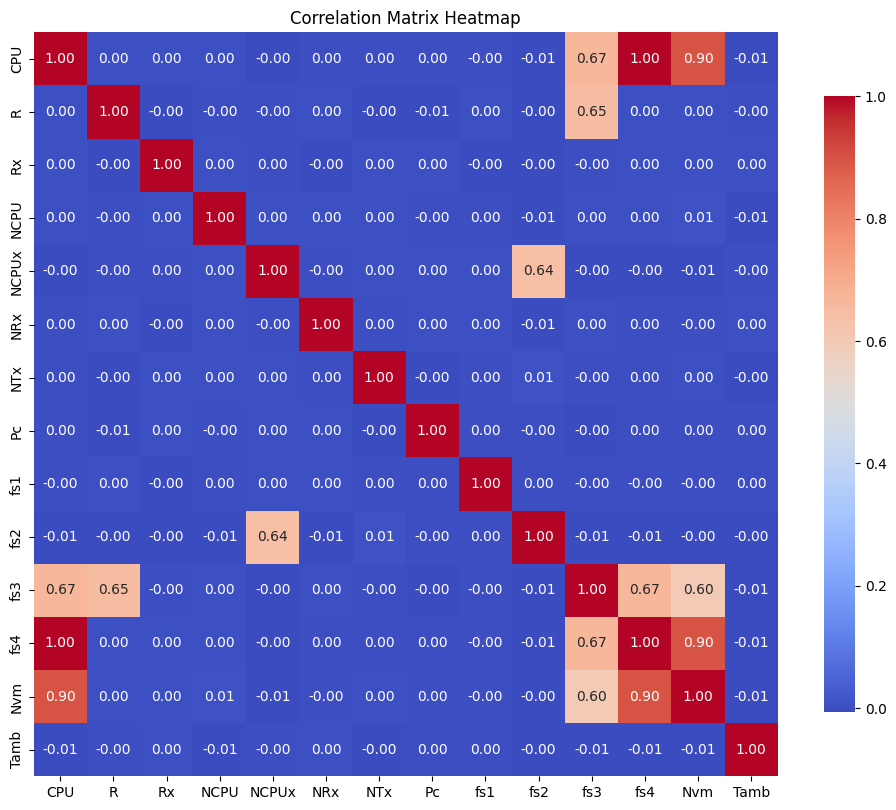

In [11]:
# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [12]:
# preprocessing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
scaled_data = scaler.fit_transform(dataset)

In [14]:
scaled_data

array([[0.37453964, 0.93066191, 0.69926993, ..., 0.37453964, 0.28178421,
        0.34856856],
       [0.9507216 , 0.93038289, 0.01760176, ..., 0.9507216 , 0.65542409,
        0.94349573],
       [0.73199828, 0.65766548, 0.42154215, ..., 0.73199828, 0.58794195,
        0.67051733],
       ...,
       [0.67445697, 0.2115331 , 0.29362936, ..., 0.67445697, 0.52111572,
        0.81089905],
       [0.49944845, 0.82656952, 0.86928693, ..., 0.49944845, 0.45682726,
        0.88548468],
       [0.38990821, 0.56507518, 0.71147115, ..., 0.38990821, 0.52498913,
        0.61577097]])

In [15]:
# train & test data splitting

train_size = int(len(scaled_data)*0.8)
test_size = len(scaled_data) - train_size

train_size, test_size

(80000, 20000)

In [16]:
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [17]:
train_X = []
train_Y = []

n_future = 1
n_past = 100


for i in range(n_past, len(train_data)-n_future+1):
    train_X.append(train_data[i-n_past:i, 0:train_data.shape[1]])
    train_Y.append(train_data[i+n_future-1:i+n_future,0])

train_X, train_Y = np.array(train_X), np.array(train_Y)

train_X.shape, train_Y.shape

((79900, 100, 14), (79900, 1))

In [18]:
test_X = []
test_Y = []

n_future = 1
n_past = 20


for i in range(n_past, len(test_data)-n_future+1):
    test_X.append(test_data[i-n_past:i, 0:test_data.shape[1]])
    test_Y.append(test_data[i+n_future-1:i+n_future,0])

test_X, test_Y = np.array(test_X), np.array(test_Y)

test_X.shape, test_Y.shape

((19980, 20, 14), (19980, 1))

Build LSTM Multi Variant Model

In [19]:
# create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [20]:
model = Sequential()

model.add(LSTM(units = 64,activation='relu', return_sequences=True, input_shape = (train_X.shape[1],train_X.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 32,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units = 1))

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mean_squared_error')

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 64)        │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,673 (127.63 KB)

 Trainable params: 32,673 (127.63 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
)

In [24]:
history = model.fit(train_X,train_Y, validation_data = (test_X, test_Y), epochs = 100, callbacks = [early_stopping],verbose = 1)

Epoch 1/100
2497/2497 ━━━━━━━━━━━━━━━━━━━━ 219s 86ms/step - loss: 0.0960 - val_loss: 0.0840
Epoch 2/100
2497/2497 ━━━━━━━━━━━━━━━━━━━━ 194s 78ms/step - loss: 0.0833 - val_loss: 0.0839
Epoch 3/100
2497/2497 ━━━━━━━━━━━━━━━━━━━━ 188s 75ms/step - loss: 0.0835 - val_loss: 0.0839
Epoch 4/100
2497/2497 ━━━━━━━━━━━━━━━━━━━━ 161s 65ms/step - loss: 0.0830 - val_loss: 0.0840
Epoch 5/100
2497/2497 ━━━━━━━━━━━━━━━━━━━━ 144s 58ms/step - loss: 0.0829 - val_loss: 0.0839
Epoch 6/100
2497/2497 ━━━━━━━━━━━━━━━━━━━━ 144s 58ms/step - loss: 0.0830 - val_loss: 0.0840
Epoch 7/100
2497/2497 ━━━━━━━━━━━━━━━━━━━━ 136s 55ms/step - loss: 0.0829 - val_loss: 0.0840
Epoch 8/100
2497/2497 ━━━━━━━━━━━━━━━━━━━━ 138s 55ms/step - loss: 0.0830 - val_loss: 0.0840
Epoch 9/100
2497/2497 ━━━━━━━━━━━━━━━━━━━━ 143s 57ms/step - loss: 0.0831 - val_loss: 0.0839
Epoch 10/100
2497/2497 ━━━━━━━━━━━━━━━━━━━━ 141s 57ms/step - loss: 0.0832 - val_loss: 0.0839
Epoch 11/100
2497/2497 ━━━━━━━━━━━━━━━━━━━━ 142s 57ms/step - loss: 0.0831 - val

In [25]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [26]:
predict = model.predict(test_X)

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

In [28]:
math.sqrt(mean_squared_error(test_Y,predict))

0.2896974699347566

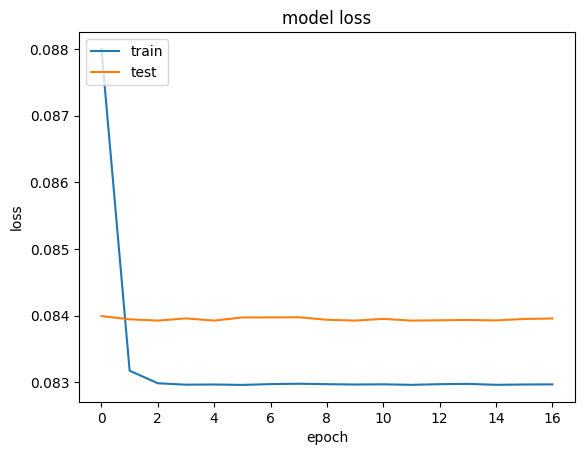

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()